https://networkx.github.io/documentation/networkx-1.10/reference/generators.html

In [8]:
# Imports
import random
import unittest
from binarytree import Node, bst as generate_bst, stringify
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [9]:
def draw_graph(graph):
    nx.draw(graph, with_labels=True, node_color='grey', node_size=1000)

.

Is there a route from 2 to 8? False



----------------------------------------------------------------------
Ran 1 test in 0.106s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

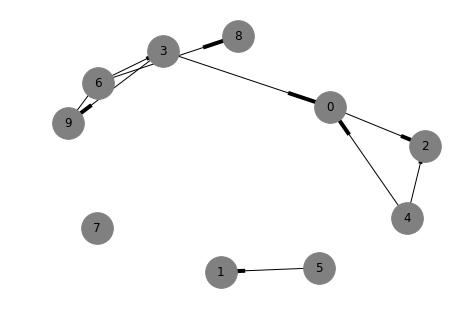

In [10]:
# 4.1 - Route Between Nodes

def get_route(graph, node, target, seen=None, level=0):
    if seen is None:
        seen = set()
    val = False
    for neighbor in graph.neighbors(node):
        if neighbor in seen:
            val |= False
        elif neighbor == target:
            val |= True
        else:
            seen.add(neighbor)
            val |= get_route(graph, neighbor, target, seen, level+1)
    return val

class Test(unittest.TestCase):
    def test(self):
        numNodes = 10
        probabilityOfEdge = 0.2
        source, target = 2, 8
        graph = nx.gnp_random_graph(numNodes, probabilityOfEdge, directed=True)
        draw_graph(graph)
        hasRoute = get_route(graph, source, target)
        print 'Is there a route from %i to %i?' % (source, target), hasRoute
        try:
            results = nx.dijkstra_path(graph, source, target)
            truth = True
        except nx.NetworkXNoPath:
            truth = False
        self.assertEqual(hasRoute, truth)

unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(Test))

In [11]:
# 4.2 - Minimal Tree - Given sorted (increasing order) array with unique elements,
#                      write an algorithm to create a binary earch tree with
#                      minimal height

def array_to_bst(array, parent=None):
    """ Create a minimal height BST from a sorted array of unique elements. """
    index = len(array) // 2
    root = Node(array[index], parent)
    left = array[:index]
    right = array[index+1:]
    if len(left) > 0:
        root.left = array_to_bst(left, root)
    if len(right) > 0:
        root.right = array_to_bst(right, root)
    return root

def max_height(root, height=0):
    if root is None:
        return height
    return max(max_height(root.left, height+1),
               max_height(root.right, height+1))

class Test(unittest.TestCase):
    def test(self):
        numNodes = 15
        array = sorted(random.sample(range(100), numNodes))
        print array
        bst = array_to_bst(array)
        print bst
        self.assertEqual(int(math.log(numNodes, 2) + 1),
                         max_height(bst))

unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(Test))

.

[3, 9, 10, 12, 15, 38, 44, 54, 71, 73, 83, 89, 90, 94, 96]

          _________54_________            
         /                    \           
    ___12___                ___89___      
   /        \              /        \     
  9          38          73          94   
 / \        /  \        /  \        /  \  
3   10    15    44    71    83    90    96
                                          



----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [12]:
# 4.3 - List of Depths - Given a BST, write an algorithm which
#                        returns a linked list for each depth layer.

class LinkedList(object):

    def __init__(self, value=None, head=None, tail=None):
        self.head = head
        self.tail = tail
        self.value = value

    def __str__(self):
        return str((self.head.value if self.head is not None else None,
                    self.value,
                    self.tail.value if self.tail is not None else None,
                    ))

    def to_list(self):
        current = self
        values = []
        while current and current.value is not None:
            values.append(current.value)
            current = current.tail
        return values

def bst_to_linked_lists(node, lists=None, height=0):
    """ Return a linked list of nodes for each depth layer in a BST. """
    if lists is None:
        lists = []
    if len(lists) == height:
        lists.append(LinkedList(node))
    else:
        tailNode = lists[height]
        while tailNode.tail is not None:
            tailNode = tailNode.tail
        tailNode.tail = LinkedList(node)
    if node.left is not None:
        bst_to_linked_lists(node.left, lists, height+1)
    if node.right is not None:
        bst_to_linked_lists(node.right, lists, height+1)
    return lists

class Test(unittest.TestCase):
    def test(self):
        height = 6
        bst = generate_bst(height)
        print bst
        self.assertEqual(max_height(bst), height+1)
        linkedLists = bst_to_linked_lists(bst)
        for l in linkedLists:
            print [x.value for x in l.to_list()]
        self.assertEqual(len(linkedLists), height+1)

unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(Test))

.


                       ___49_______________                      
                      /                    \                     
     _______________42                      66_________          
    /                 \                    /           \         
  15                   46          ______62          ___83____   
 /  \                             /                 /         \  
7    16___                      55                77          124
          \                    /  \              /  \        /   
           32                53    57          70    78    96    
          /  \                       \                           
        23    36                      59                         
                \                                                
                 40                                              
                                                                 
[49]
[42, 66]
[15, 46, 62, 83]
[7, 16, 55, 77, 124]
[32, 53, 57, 70, 78, 96


----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [63]:
# 4.4 - Checked Balanced

def _is_balanced(root, height=0):
    if root is None:
        return height
    lHeight = max_height(root.left, height+1)
    rHeight = max_height(root.right, height+1)
    if False in [lHeight, rHeight]:
        return False
    if abs(lHeight-rHeight) > 1:
        return False
    return max(lHeight, rHeight)

def is_balanced(root):
    return _is_balanced(root) is not False

class Test(unittest.TestCase):
    def test(self):
        height = 3
        bst = generate_bst(height)
        print bst
        print 'is balanced?', is_balanced(bst)

unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(Test))

.


       ___13   
      /     \  
  __10       14
 /    \        
0      12      
 \             
  3            
               
is balanced? False



----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>